## **Project 1: Building Intelligence Systems Using Regression Models**

### **Advisor: Dr. Hum Nath Bhandari, Department of Mathematics, RWU**

### **Course**: MATH 355/COMSC 415-Machine Learning 

### Group Members: Ella Costigan, Donovan Dunning and Morgan Kiely


### Deadlines:  

- Group Formation: Oct 05 (Wednesday)
- Problem Selection, Data, and Abstract:  Oct 10 (Monday)
- Initial draft of full project :  Oct 17 (Monday)
- Final paper presentation: Oct 21 (Friday)
- Revised Paper Submission: Oct 24 (Monday)

### Overview

In this project, you will build predictive models using regression models. This involves understanding the scope of the given problem; extracting related data from the given resource; organizing, cleaning, and manipulating data; handling missing values; performing data analysis and visualization. In addition, you will build various regression models and compare the performance of the models to identify the best model. Finally, you will validate the model performance using statistial analysis.



###  Expectations

This project has the following expectations:
- Ability to ask research questions and building a research framework to identify potential solutions.
- Ability to import and implement various python modules.
- Loading and inspecting data to get basic information.
- Data Exploration and visualization.
- Cleaning the data and handling the missing values (if any).
- Feature selections, data filtering, and data preprocessing.
- Creating tidy data for feeding to learning algorithms.
- Input preprations and transformation.
- Building, training, and testing regression models.
- Proformance analysis and model selections.
- Performing statistical analysis.
- Documenting and presenting intermediate and final results in scientific community.

### Guidelines

1. This is a group project, therefore, you are allowed to work in a group of two people (or three in maximum but you need to get permission for the extended group). I can accept individual submission if you really can not find any other group member. But, if you can, work in a group.

2. If you are working in a group, there must be equal contributions of all the group members within a group.

3. You should maintain your originality in the project. You can have a robust discussion about the project ideas and possible techniques of solving with your friends outside your group but all the work in the project must be of yours. I may ask to explain some pieces of code and results during the grading process.

4. Once you are done with the project, you will submit the full report in Notebook and HTML. The report should be well organized and should maintain the scientific writing standards such as summary or abstract/introduction, methodology, experimental results, plots, discussion of the results, and conclusion. One submission per group will be sufficient where you can write name of all group members on the top of the document.

5. As a final product,you need to write a paper and present in class. 

### Data
Data can be obtained from **UCI Machine Learning Repository**: 

Go to the followingn link: https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Project Components


### Abstract:

Understanding stock exchange can be beneficial to research. Similar to in the real world, we see how the daily returns can effect the economy. With this being said, we are conducting a research project on Istanbul's Stock Exchanges. The goal of this research is the build an intelligent system using regression models. By doing this, there will be visualizations using Python's Seaborn and Matplot libraries and importing SkiLearn libraries. With the SkiLearn libraries, we are able to conduct thorough a data analysis to compare Instabul's stock exchange market to other countries such as Japan, Brazil, Germany and United Kingdom. 

https://archive.ics.uci.edu/ml/datasets/ISTANBUL+STOCK+EXCHANGE

### Introduction / Methology


Using this data set we will be able to predict the future market of the Istanbul with regards to stock trade and analysis. We will be using linear, lasso, ridge, elastic net, and random forest regression. With these regression models we will build an self evaluating system to make accurate predictions of future market trades. Using multiple libraries we can visualize this data in plots allowing for the end reader to better understand the output of this data set. When beginning this project we needed to parse through the data and decide what sectors we wanted to manipulate and run tests through first. Once deciding this we were able to pre process and parse through the needed data sets. Witht the data parsed we wanted to apply multiple different approches in order to understand the differences between the methods.

### Literature Review 



*   Istanbul stock exchange national 100 index
*   Standard & poor's 500 return index
*   Stock market return index of Germany
*   Stock market return index of UK
*   Stock market return index of Japan
*   Stock market return index of Brazil
*   MSCI European index
*   MSCI emerging markets index

### Getting Data, Cleaning, and  Preprocessing. 


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score



col_names = ['date' , 'ISE TL BASED' ,'ISE USD BASED', 'SP', 'DAX', 'FTSE' , 'NIKKEI' , 'BOVESPA' ,'EU', 'EM']

col_names2 = ['ISE TL BASED' ,'ISE USD BASED', 'SP', 'DAX', 'FTSE' , 'NIKKEI' , 'BOVESPA' ,'EU', 'EM']

data_path = "/content/drive/MyDrive/Project1_Group1/data.csv"

data = pd.read_csv(data_path)

data.set_index('date', inplace=True)

data

,ISE TL BASED,ISE USD BASED,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
"January 5, 2009",0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
"January 6, 2009",0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
"January 7, 2009",-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
"January 8, 2009",-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
"January 9, 2009",0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...
"February 16, 2011",0.008599,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
"February 17, 2011",0.009310,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
"February 18, 2011",0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938


In [ ]:
print(data.head(10))

print(data.info())

print(data.describe().transpose())

                  ISE TL BASED  ISE USD BASED        SP       DAX      FTSE  \
date                                                                          
January 5, 2009       0.035754       0.038376 -0.004679  0.002193  0.003894   
January 6, 2009       0.025426       0.031813  0.007787  0.008455  0.012866   
January 7, 2009      -0.028862      -0.026353 -0.030469 -0.017833 -0.028735   
January 8, 2009      -0.062208      -0.084716  0.003391 -0.011726 -0.000466   
January 9, 2009       0.009860       0.009658 -0.021533 -0.019873 -0.012710   
January 12, 2009     -0.029191      -0.042361 -0.022823 -0.013526 -0.005026   
January 13, 2009      0.015445      -0.000272  0.001757 -0.017674 -0.006141   
January 14, 2009     -0.041168      -0.035552 -0.034032 -0.047383 -0.050945   
January 15, 2009      0.000662      -0.017268  0.001328 -0.019551 -0.014335   
January 16, 2009      0.022037       0.032278  0.007533  0.006791  0.006289   

                    NIKKEI   BOVESPA        EU     

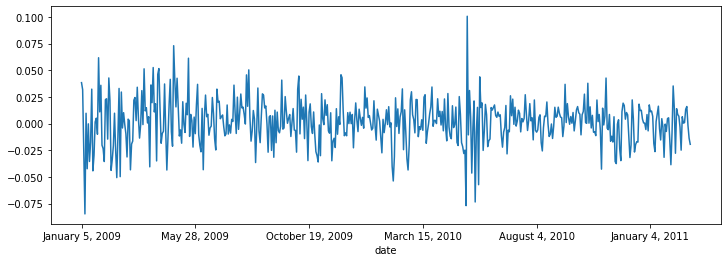

In [ ]:
data['ISE USD BASED'].plot(figsize=(12,4))
plt.show()

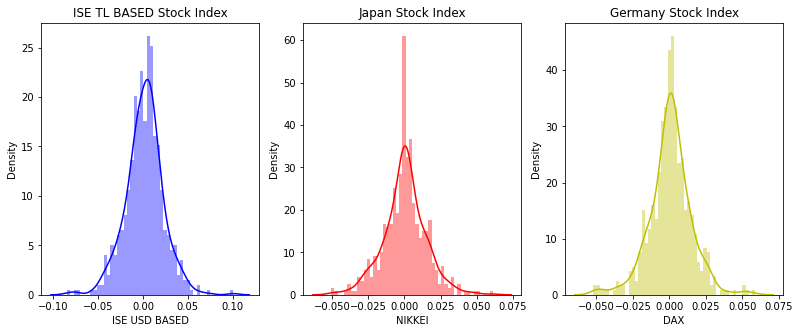

In [ ]:
plt.figure(figsize = (18,5))

plt.subplot(141)
sns.distplot(data['ISE USD BASED'].dropna(), bins=50, color='b')
plt.title("ISE TL BASED Stock Index")

plt.subplot(142)
sns.distplot(data['NIKKEI'].dropna(), bins=50, color='r')
plt.title("Japan Stock Index")

plt.subplot(143)
sns.distplot(data['DAX'].dropna(), bins=50, color='y')
plt.title("Germany Stock Index")

plt.show()

Text(0.5, 1.0, 'Brazil Stock Index')

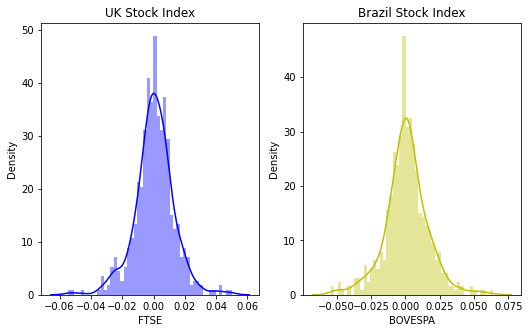

In [ ]:
plt.figure(figsize = (18,5))

plt.subplot(141)
sns.distplot(data['FTSE'].dropna(), bins=50, color='b')
plt.title("UK Stock Index")

plt.subplot(142)
sns.distplot(data['BOVESPA'].dropna(), bins=50, color='y')
plt.title("Brazil Stock Index")

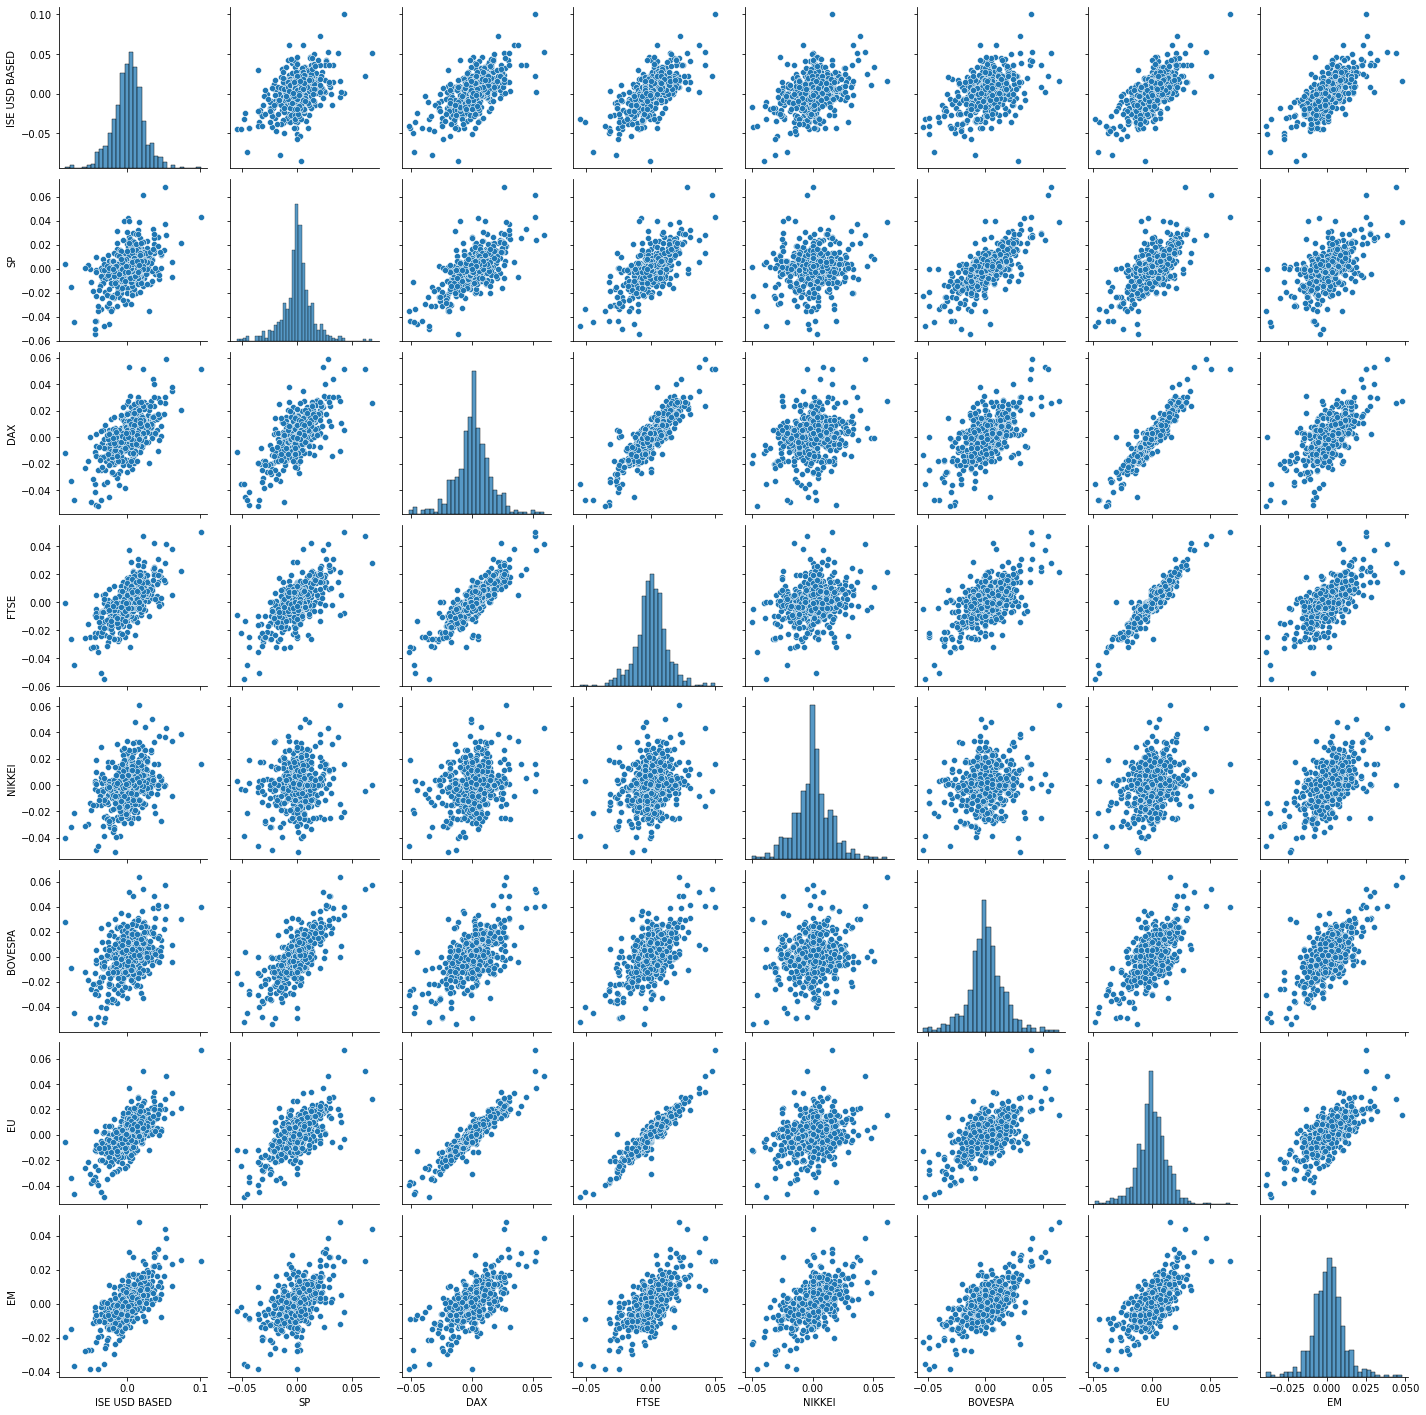

In [ ]:
sns.pairplot(data.iloc[:, 1:])

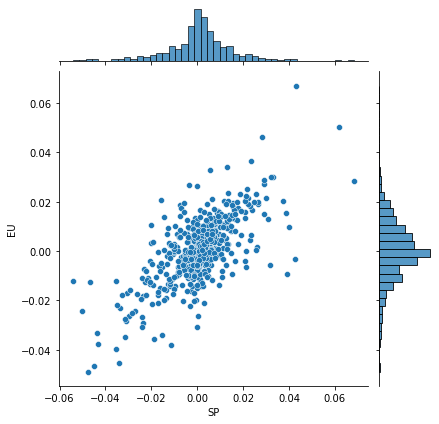

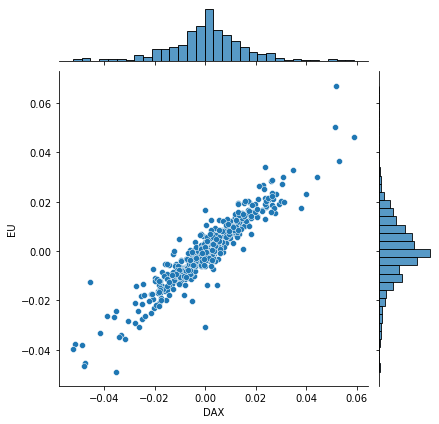

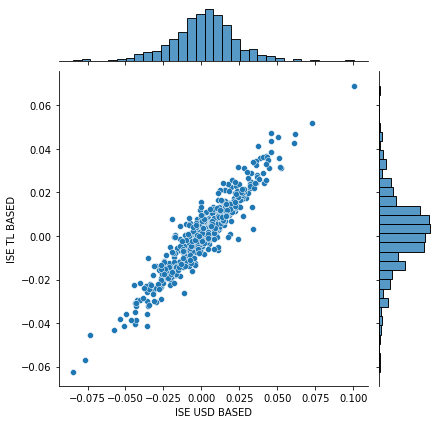

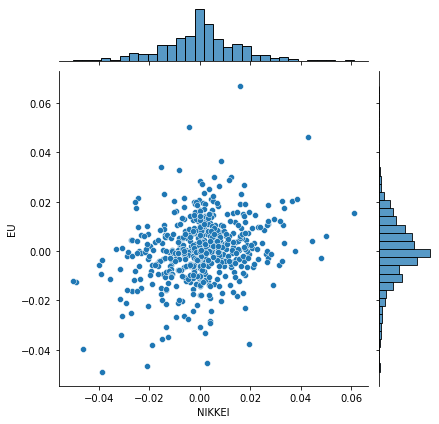

In [ ]:
sns.jointplot('SP','EU', data = data)
sns.jointplot('DAX','EU', data = data)
sns.jointplot('ISE USD BASED', 'ISE TL BASED', data = data)
sns.jointplot('NIKKEI','EU', data = data)

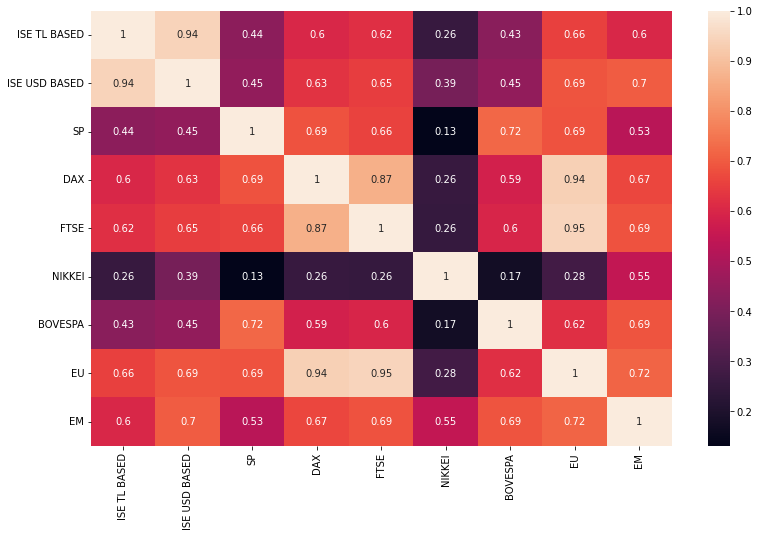

In [ ]:
plt.figure(figsize = (13,8))
sns.heatmap(data.corr(), annot = True)

#plt.show()

plt.savefig("heatmap.png")

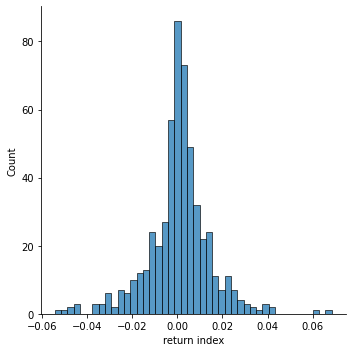

In [ ]:
sns.displot(data['SP'])
plt.xlabel('return index')
plt.ylabel('Count')
plt.show()

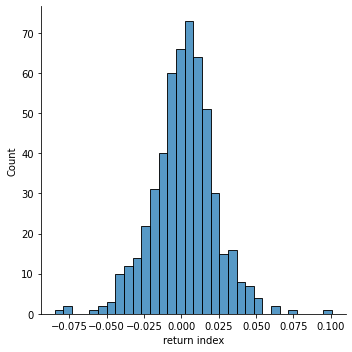

In [ ]:
sns.displot(data['ISE USD BASED'])
plt.xlabel('return index')
plt.ylabel('Count')
plt.show()

### Modeling Approach ( Regression Models)


CALCULATE SCORES METHODS

In [ ]:
import math

def root_mean_square_error(y_true, y_pred):
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
from sklearn.metrics import r2_score

def calculate_scores(y_true, y_pred):
    #=====mse====
    mse = mean_squared_error(y_true, y_pred)
    #===== rmse===
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    #===== R2===
    R2_score = r2_score(y_true, y_pred)
    #===== R===
    R = np.corrcoef(y_true, y_pred)
    #===== mape===
    mape = mean_absolute_percentage_error(y_true, y_pred)
    output = {'rmse':rmse, 'R2_score': R2_score, 'R':R[0,1], 'mape': mape}
    return output

PREPROCESSING DATA

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

print(scaler.fit(data))

data_scaled = scaler.fit_transform(data)

data_scaled = pd.DataFrame(data_scaled, columns = col_names2)
print(data_scaled.describe().transpose())

MinMaxScaler()
               count      mean       std  min       25%       50%       75%  \
ISE TL BASED   536.0  0.486711  0.124004  0.0  0.423448  0.490980  0.554987   
ISE USD BASED  536.0  0.465467  0.113965  0.0  0.404471  0.471351  0.531597   
SP             536.0  0.447737  0.114924  0.0  0.404370  0.449638  0.497173   
DAX            536.0  0.476736  0.130814  0.0  0.414435  0.478234  0.544157   
FTSE           536.0  0.526222  0.120371  0.0  0.466123  0.525255  0.592020   
NIKKEI         536.0  0.454483  0.132974  0.0  0.385401  0.451728  0.522308   
BOVESPA        536.0  0.465695  0.133886  0.0  0.396417  0.460116  0.533235   
EU             536.0  0.425407  0.112119  0.0  0.369974  0.423036  0.488596   
EM             536.0  0.457345  0.121585  0.0  0.389643  0.458980  0.520871   

               max  
ISE TL BASED   1.0  
ISE USD BASED  1.0  
SP             1.0  
DAX            1.0  
FTSE           1.0  
NIKKEI         1.0  
BOVESPA        1.0  
EU             1.0  
EM   

In [ ]:
X_data = data_scaled.drop('ISE USD BASED', axis = 1)
y_data = data_scaled['ISE USD BASED']

print("X_data Shape: " , X_data.shape)
print("y_data Shape: " , y_data.shape)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 5)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_data Shape:  (536, 8)
y_data Shape:  (536,)
X_train Shape:  (375, 8)
X_test Shape:  (161, 8)
y_train Shape:  (375,)
y_test Shape:  (161,)


### **LINEAR REGRESSION MODEL**

In [ ]:
linear_model = LinearRegression()

print(linear_model)

linear_model.fit(X_train, y_train)

y_pred_lin_reg = linear_model.predict(X_test)
y_pred_lin_reg

mse_score = mean_squared_error(y_test,y_pred_lin_reg)
print("\nScore of Linear Regression:", mse_score , "\n")

print("Coefs:\n ",linear_model.coef_)
print("\nIntercepts: ",linear_model.intercept_)

lin_reg_scores = calculate_scores(y_test, y_pred_lin_reg)
print("\n",lin_reg_scores)

LinearRegression()

Score of Linear Regression: 0.0010044313672530774 

Coefs:
  [ 0.73098779  0.01897858 -0.04884075 -0.07673921  0.06602149 -0.08187642
  0.1682079   0.18610583]

Intercepts:  0.015540353411413577

 {'rmse': 0.03169276521941684, 'R2_score': 0.9347876092887009, 'R': 0.9684010479537196, 'mape': 6.17019824591701}


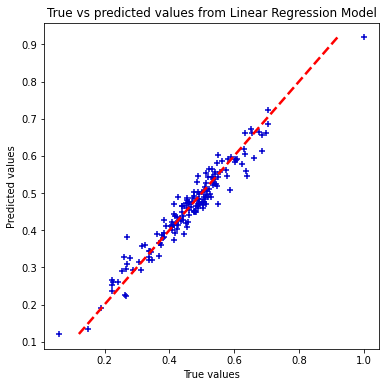

In [ ]:
fig = plt.figure(figsize = (6,6))
plt.scatter(y_test, y_pred_lin_reg, marker = "+", color = "mediumblue")
identity_line = np.linspace(max(min(y_test), min(y_pred_lin_reg)), min(max(y_test), max(y_pred_lin_reg)))
plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs predicted values from Linear Regression Model")
plt.savefig('LinearRegression.png')

## **LASSO REGRESSION MODEL**

## **LASSO REGRESSION MODEL**

In [ ]:
from sklearn.linear_model import Lasso 

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size = .7)

lasso_reg = Lasso(alpha = 0)

lasso_reg.fit(X_train, y_train)

y_pred_lasso = lasso_reg.predict(X_test)

lasso_scores = calculate_scores(y_test, y_pred_lasso)

print(lasso_scores)

{'rmse': 0.032413515723767605, 'R2_score': 0.9128997191906701, 'R': 0.9564466207719323, 'mape': 6.291671340552582}


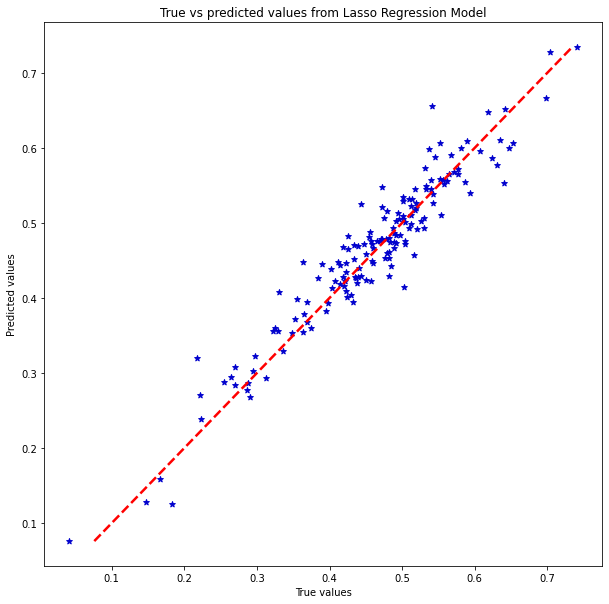

In [ ]:
fig = plt.figure(figsize = (10,10))
plt.scatter(y_test, y_pred_lasso, marker = "*", color = "mediumblue")
identity_line = np.linspace(max(min(y_test), min(y_pred_lasso)), min(max(y_test), max(y_pred_lasso)))
plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs predicted values from Lasso Regression Model")
plt.show()

### **RANDOM FOREST REGRESSION MODEL**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(max_depth=2, random_state=0)

rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

rf_scores = calculate_scores(y_test, y_pred_rf)
print(rf_scores)

{'rmse': 0.05413952312362333, 'R2_score': 0.8097000355098704, 'R': 0.9108235827677105, 'mape': 10.259647009740833}




```
# This is formatted as code
```

### ** RIDGE REGRESSION MODEL WITH TOP 4 FEATURES**

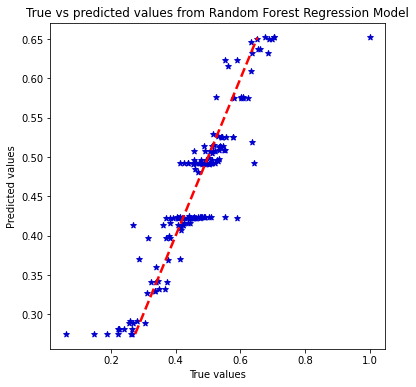

In [ ]:
fig = plt.figure(figsize = (6,6))
plt.scatter(y_test, y_pred_rf, marker = "*", color = "mediumblue")
identity_line = np.linspace(max(min(y_test), min(y_pred_rf)), min(max(y_test), max(y_pred_rf)))
plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs predicted values from Random Forest Regression Model")
plt.show()

In [ ]:
#top4_features_ridge = ['ISE TL BASED' , 'ISE USD BASED' , 'SP' , 'EU']
#sns.pairplot(data[top4_features_ridge])

In [ ]:
from sklearn.linear_model import Ridge

alphas = [0.0001, 0.001, 0.01, 0.9]


collect_all_predictions = []

collect_all_scores = []

collect_all_coefficients = []

collect_all_intercepts = []


#X_features = data_new[top4_features_ridge].values
#y = data['ISE TL BASED'].values

#X_train, X_test, y_train, y_test = train_test_split(X_features, y, train_size=.7)

for i in range(len(alphas)):
   
    #===== Build ridge reg model with given alpha=====#
    ridge_reg = Ridge(alpha = alphas[i])
   
    #===== Fit ridge reg model in training data=======#
    ridge_reg.fit(X_train, y_train)
   
    #===== Find prediction in test/validation data(validation data prefered)=======#
    y_pred_ridge = ridge_reg.predict(X_test) # It would be better if you can you can create validation set for tuning
   
    #==== Collect all the predictions ======== #
   
    collect_all_predictions.append(y_pred_ridge) 

    
    #===== Find scores =======#
    ridge_scores = calculate_scores(y_test, y_pred_ridge)
   
    #===== Collect scores in the list=======#
    collect_all_scores.append(ridge_scores)
    
   
    #===== Collect all coefficients in the list=======#
    collect_all_coefficients.append(ridge_reg.coef_)
   
    #===== Collect all intercepts in the list=======#
   
    collect_all_intercepts.append(ridge_reg.intercept_)
   
   

output_dictionary = {
     
            "predictions": collect_all_predictions,
               
            "scores": collect_all_scores,
               
            "coefficients": collect_all_coefficients,
               
            "intercepts": collect_all_intercepts
               }

#print(output_dictionary)

print(output_dictionary['scores'][0]) # result of first alpha  value
print(output_dictionary['scores'][1]) # result of second alpha  value

print(output_dictionary['scores'][3]) # result of fifth alpha  value 

{'rmse': 0.03241370402659634, 'R2_score': 0.9128987071883289, 'R': 0.9564462597560458, 'mape': 6.291756289748222}
{'rmse': 0.032415404945585584, 'R2_score': 0.9128895656147539, 'R': 0.9564429951622738, 'mape': 6.29251797843028}
{'rmse': 0.036209713418432814, 'R2_score': 0.8913030265161326, 'R': 0.9480996466456557, 'mape': 7.672575320179444}


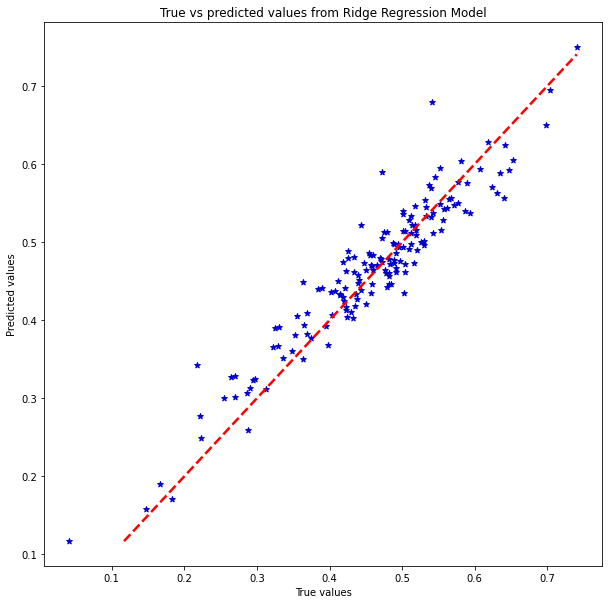

In [ ]:
fig = plt.figure(figsize = (10,10))
plt.scatter(y_test, y_pred_ridge, marker = "*", color = "mediumblue")
identity_line = np.linspace(max(min(y_test), min(y_pred_ridge)), min(max(y_test), max(y_pred_ridge)))
plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs predicted values from Ridge Regression Model")
plt.show()

[21:59:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'rmse': 0.036012710563249936, 'R2_score': 0.9103779112020702, 'R': 0.9568313526218484, 'mape': inf}


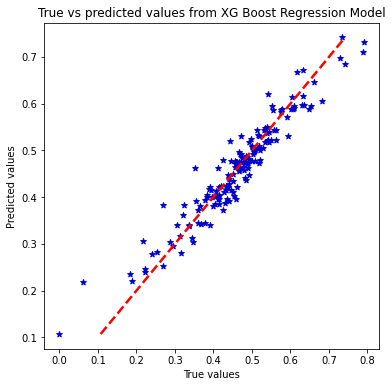

In [ ]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size = .7)

xgb_reg = XGBRegressor(alpha = 1.0)

xgb_reg.fit(X_train, y_train)

y_pred_xgb = xgb_reg.predict(X_test)

xgb_scores = calculate_scores(y_test, y_pred_xgb)

print(xgb_scores)

fig = plt.figure(figsize = (6,6))
plt.scatter(y_test, y_pred_xgb, marker = "*", color = "mediumblue")
identity_line = np.linspace(max(min(y_test), min(y_pred_xgb)), min(max(y_test), max(y_pred_xgb)))
plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs predicted values from XG Boost Regression Model")
plt.show()

# **CALCULATE SCORES VISUALIZATIONS**

In [ ]:
model_scores = pd.DataFrame({
    'Linear Regression' : [lin_reg_scores['rmse'], lin_reg_scores['R2_score'], lin_reg_scores['R'], lin_reg_scores['mape']],
    'Lasso Regression' : [lasso_scores['rmse'], lasso_scores['R2_score'], lasso_scores['R'], lasso_scores['mape']],
    #'Elastic Net Regression' : [elas_scores['rmse'], elas_scores['R2_score'], elas_scores['R'], elas_scores['mape']],
    'Random Forest Regression' : [rf_scores['rmse'], rf_scores['R2_score'], rf_scores['R'], rf_scores['mape']],
    'Ridge Regression' : [ridge_scores['rmse'], ridge_scores['R2_score'], ridge_scores['R'], ridge_scores['mape']],
    'XG Boost Regression' : [xgb_scores['rmse'], xgb_scores['R2_score'], xgb_scores['R'], xgb_scores['mape']],
})

model_scores = model_scores.rename(index = ({0: "RMSE", 1: "R^2", 2: "R", 3: "MAPE"}))

model_scores

,Linear Regression,Lasso Regression,Random Forest Regression,Ridge Regression,XG Boost Regression
RMSE,0.031693,0.032414,0.048403,0.036210,0.036013
R^2,0.934788,0.912900,0.805774,0.891303,0.910378
R,0.968401,0.956447,0.904082,0.948100,0.956831
MAPE,6.170198,6.291671,11.951841,7.672575,inf


## **PLOT LEARNING CURVES**

In [ ]:
from mlxtend.plotting import plot_learning_curves

def plot_learning_curves(data, X_data, y_data):
    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=10)
    val_errors = []
    train_errors = []
    for m in range(1, len(X_train) + 1):
        data.fit(X_train[:m], y_train[:m])
        y_train_predict = data.predict(X_train[:m])
        y_val_predict = data.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

    plt.show()

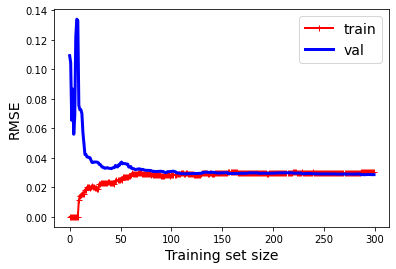

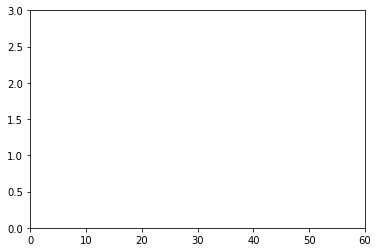

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_train, y_train)
plt.axis([0, 60, 0, 3])                         
plt.show() 
# A training size anywhere above 25 will not benefit us. Our convergence is about RMSE value 0.1. The model seems to generalize properly. This indicates a low error.

### Experimental Results and Discussion

Our experimental design process required us to use a few different regression models to build intelligent models. The regression models used are Linear, Ridge, Lasso, Random Forest and XGboost. By importing these regression models, we are able to create a set of predicted values to compare and scale amongst true values. This design process also included calculating root squared mean error (rmse), R2, R and mean absolute percentage error (mape). These calculations are shown in table 2. We can use the chart to determine that our Lasso Regression model has the smallest percentage error. The visualizations for the regression models are below.

### Conclusion 

By using the tools of  regression throughout the project we were able to take this particular data set of the market of Istanbul by comparison to other stock markets. The different tools that were used to break down the data were that of linear, lasso, ridge, elastic net, and random forest regression. The data received from the creation of the regression models was in the end a way to make a system that can effectively make predictions on future market trends. Then through the use of plots and visualization, it gave a better perspective of what it was that we were attempting to get out of the project, which gave the reader a better understanding of the project and what was being researched.


### Ethics and Implications


Research regarding stock predictions can be very effective in rational investing based on ethical judgments. Allowing retail investors access to machine learning algorithms like this can help them handle massive amounts of data for long term investment banking. When large investment banking companies around the world want to optimize and maximize their output the main sources they pull from are machine learning algorithms like this. A large part of the future of mass investment will be feuled by this technology. Weather or not these advancements prove to be positive or negative is yet to be seen but there are many debates within the field on regulating the output of these systems. Many privater investors beleive it could result in downtrends in markets due to people only investing on what their chosen algorithm tells them is the best choice could result in mass hive mind sents regarding investment. On the other hand these systems could be used to put more power in the hands of the people allowing them to invest more intellegently based upon the trends in the market only top level investors would normally catch onto. In the coming years we will see many changes and laws come into effect either restriciting or allowing for more of these algorithms to be patented and used for major stock operations. 

### Acknowledgement

Math/Computer Science department, Math355/COMSC415 course, and RWU.

### References


Khalid Alkhatib Hassan Najadat Ismail Hmeidi and Mohammed K. Ali Shatnawi "Stock Price Prediction Using K-Nearest Neighbor (kNN) Algorithm" International Journal of Business Humanities and Technology 2013}


M. P. Mali H. Karchalkar A. Jain A. Singh and V. Kumar "Open Price Prediction of Stock Market using Regression Analysis" Ijarcce vol. 6 no. 5 pp. 418-421 2017. 